# IF240 - Machine Learning and deep learning

## Practice 3: SVM 

By Aurélie Bugeau

Credits: Vincent Lepetit

### Objectives 
The objective of the practice is to apply SVM with different kernels. You will use the two following 2 moons and 2 circles datasets.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_circles

X_moons, y_moons = make_moons(n_samples=1500, noise=0.05, random_state=0)
X_circles, y_circles = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=0)

plt.figure(figsize=(8, 4))
plt.subplot(121); plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=10, cmap='viridis')
plt.subplot(122); plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, s=10, cmap='viridis')

### Question 1
Explain what the variables `X_moons`, `y_moons`, `X_circles` and `y_circles` contain exactly

X_moons : C'est une matrice de taille (n, 2) contenant les points appartenant aux deux lunes.

Y_moons : contient les labels pour les points de X_moons.

X_circles : C'est une matrice de taille (n, 2) contenant les points appartenant aux deux circles.

Y_circles : contient les labels pour les points de X_cicrles.

Separate the data into training and test data with:

In [ ]:
indices = np.random.permutation(len(X_moons))
X_moons_train = X_moons[indices[:-40]]
y_moons_train = y_moons[indices[:-40]]
X_moons_valid = X_moons[indices[-40:-20]]
y_moons_valid = y_moons[indices[-40:-20]]
X_moons_test  = X_moons[indices[-20:]]
y_moons_test  = y_moons[indices[-20:]]

In [ ]:
X_circles_train = X_circles[indices[:-40]]
y_circles_train = y_circles[indices[:-40]]
X_circles_valid = X_circles[indices[-40:-20]]
y_circles_valid = y_circles[indices[-40:-20]]
X_circles_test  = X_circles[indices[-20:]]
y_circles_test  = y_circles[indices[-20:]]

## Linear SVM
### Question 2
Apply linear SVM to these data and print the accuracy on the test datasets.

In [ ]:
from sklearn import svm

#Create a svm classifier
svc = svm.SVC(kernel='linear')

def evaluate_svm_accuracy(clf, X_train, y_train, X_test ,y_test) :
    #train the model using the training sets
    clf.fit(X_train, y_train)

    #Evaluate accurary
    return clf.score(X_test, y_test)

print("Accuracy (Moons):",evaluate_svm_accuracy(svc, X_moons_train, y_moons_train, X_moons_test, y_moons_test))
print("Accuracy (Circles):",evaluate_svm_accuracy(svc, X_circles_train, y_circles_train, X_circles_test, y_circles_test))


### Question 3
Check the documentation at http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC to see how to change the parameter $C$, the weight between the classification score and the regularization term.

Use the validation sets to identify the optimal value for $C$ and print the value of the corresponding on the test set.

In [31]:
def get_optimal_c(c_min, c_max, nb_step,knl_type, X_train, y_train, X_valid, y_valid):
    C_values = np.linspace(c_min, c_max, nb_step)
    c_opt = C_values[0]
    accuracy_opt = 0

    for c in C_values: 
        svc = svm.SVC(C=c, kernel=knl_type)
        accuracy = evaluate_svm_accuracy(svc, X_train, y_train, X_valid, y_valid)
        if accuracy > accuracy_opt:
            accuracy_opt = accuracy
            c_opt = c
    
    return c_opt

c_moons = get_optimal_c(0.1, 100, 10,'linear', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
svc = svm.SVC(C=c_moons, kernel='linear')
print("the optimal value for C (Moons):", c_moons)
print("Accuracy (Moons):",evaluate_svm_accuracy(svc, X_moons_train, y_moons_train, X_moons_test, y_moons_test))

c_circles = get_optimal_c(0.1, 100, 10,'linear', X_circles_train, y_circles_train, X_circles_valid, y_circles_valid)
svc = svm.SVC(C=c_circles, kernel='linear')
print("the optimal value for C (Circles):", c_circles)
print("Accuracy (Circles):",evaluate_svm_accuracy(svc, X_circles_train, y_circles_train, X_circles_test, y_circles_test))


the optimal value for C (Moons): 0.1
Accuracy (Moons): 0.9
the optimal value for C (Circles): 0.1
Accuracy (Circles): 0.5


### Question 4
Let us visualize the result. For visualizing in 2D  the effect of an SVM classifier, you are given the following functions

In [ ]:
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

The visualization functions can be used in the following way. Classification of every point on the meshgrid is made. Explain the result

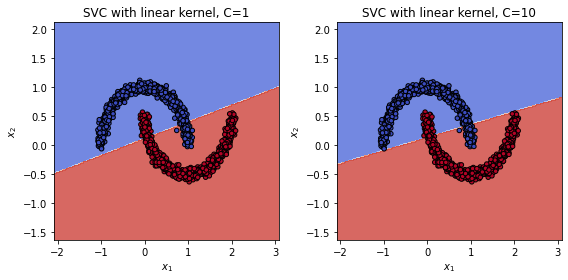

In [33]:
X_test = X_moons_train
y_test = y_moons_train

models = (svm.SVC(kernel='linear', C=0.1),
          svm.SVC(kernel='linear', C=100))
models = (clf.fit(X_test, y_test) for clf in models)

# title for the plots
titles = ('SVC with linear kernel, C=1',
          'SVC with linear kernel, C=10')

# Set-up 1x2 grid for plotting.
fig, sub = plt.subplots(1, 2, figsize=(8, 4))

X0, X1 = X_test[:, 0], X_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

for i, (clf, title) in enumerate(zip(models, titles)):
    ax = plt.subplot(1, 2, i+1)
    plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(title)

plt.tight_layout()

On remarque que le résultat de la deuxième classification (C = 10) est plus précis, cela s'éxplique par la valeur de la variable C, plus celle-ci est grande plus la marge est petit. Mais l'amélioration reste faible à cause de la distribution des points. le SVM linéaire n'est pas adapté pour ce cas.

## Non-Linear SVM

You can now create a non-linear support vector machine classifier with Gaussian kernels. See if you can tune $C$ and $\gamma$, the standard deviation of the kernels to improve the classification results on the two datasets.

Print the classification results (accuracy) and plot the datasets with the decision boundaries.

Next, you can experiment with the polynomial kernel.

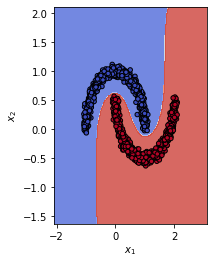

Accuracy using gaussian kernel (Moons): 1.0


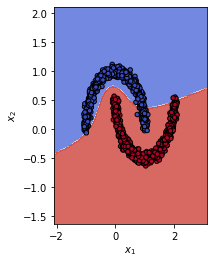

Accuracy using polynomial kernel (Moons): 0.9


In [51]:
def get_optimal_gamma(gamma_min, gamma_max, nb_step, knl_type, X_train, y_train, X_valid, y_valid):
    gamma_values = np.linspace(gamma_min, gamma_max, nb_step)
    gamma_opt = gamma_values[0]
    accuracy_opt = 0

    for gamma in gamma_values: 
        svc = svm.SVC(gamma=gamma, kernel=knl_type)
        accuracy = evaluate_svm_accuracy(svc, X_train, y_train, X_valid, y_valid)
        if accuracy > accuracy_opt:
            accuracy_opt = accuracy
            gamma_opt = gamma
    
    return gamma_opt

def plot_decision_boundaries(X_test, Y_test, clf) :
    clf.fit(X_test, y_test)
    
    X0, X1 = X_test[:, 0], X_test[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    ax = plt.subplot(1, 2, i+1)
    plot_contours(ax, clf, xx, yy, cmap='coolwarm', alpha=0.8)
    plt.scatter(X0, X1, c=y_test, cmap='coolwarm', s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    plt.show()


c_moons = get_optimal_c(0.1, 100, 10, 'rbf', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
gamma_moons = get_optimal_gamma(0.01, 10, 10, 'rbf', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
svc = svm.SVC(C=c_moons, gamma = gamma_moons, kernel='rbf')
plot_decision_boundaries(X_moons_train, y_moons_train, svc)
print("Accuracy using gaussian kernel (Moons):",evaluate_svm_accuracy(svc, X_moons_train, y_moons_train, X_moons_test, y_moons_test))

c_moons = get_optimal_c(0.1, 100, 10, 'poly', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
gamma_moons = get_optimal_gamma(0.01, 10, 10, 'poly', X_moons_train, y_moons_train, X_moons_valid, y_moons_valid)
svc = svm.SVC(C=c_moons, gamma = gamma_moons, kernel='poly')
plot_decision_boundaries(X_moons_train, y_moons_train, svc)
print("Accuracy using polynomial kernel (Moons):",evaluate_svm_accuracy(svc, X_moons_train, y_moons_train, X_moons_test, y_moons_test))